# Fruits 360 - Convolutional Neural Networks Using TensorFlow

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Creating Data Pipelines

In [2]:
train_ds_ = image_dataset_from_directory(
    '../input/fruits/fruits-360/Training',
    labels='inferred',
    label_mode='categorical',
    image_size=(100,100),
    interpolation='nearest',
    shuffle=True,
    batch_size=512
)

test_ds_ = image_dataset_from_directory(
    '../input/fruits/fruits-360/Test',
    labels='inferred',
    label_mode='categorical',
    image_size=(100,100),
    interpolation='nearest',
    shuffle=False,
    batch_size=512
)

# Pipeline
def convert_to_float(image, label):
    image = image / 255
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = (
    train_ds_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

test_ds = (
    test_ds_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 67692 files belonging to 131 classes.
Found 22688 files belonging to 131 classes.


## Defining the Model

In [3]:
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(100,100,3)),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(131, activation='softmax')
])

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         2

## Training the Model

In [5]:
early_stopping = EarlyStopping(
    min_delta=1e-3,
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    batch_size=512,
    validation_data=(test_ds),
    callbacks=[early_stopping],
    epochs=500,
    verbose=1
)

Epoch 1/500
133/133 [==============================] - 429s 3s/step - loss: 1.5044 - accuracy: 0.6426 - val_loss: 0.6415 - val_accuracy: 0.8427
Epoch 2/500
133/133 [==============================] - 12s 93ms/step - loss: 0.0612 - accuracy: 0.9820 - val_loss: 0.4637 - val_accuracy: 0.8968
Epoch 3/500
133/133 [==============================] - 12s 92ms/step - loss: 0.0327 - accuracy: 0.9903 - val_loss: 0.2961 - val_accuracy: 0.9498
Epoch 4/500
133/133 [==============================] - 12s 93ms/step - loss: 0.0764 - accuracy: 0.9790 - val_loss: 0.2439 - val_accuracy: 0.9426
Epoch 5/500
133/133 [==============================] - 12s 94ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.2808 - val_accuracy: 0.9435
Epoch 6/500
133/133 [==============================] - 12s 94ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.2351 - val_accuracy: 0.9602
Epoch 7/500
133/133 [==============================] - 12s 92ms/step - loss: 4.5078e-04 - accuracy: 1.0000 - val_loss: 0.2373 - val

## Plotting Train and Validation Accuracy and Loss

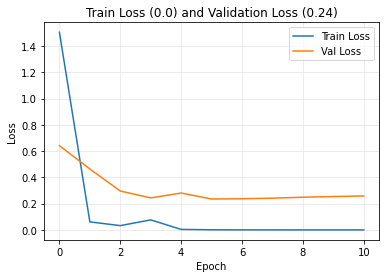

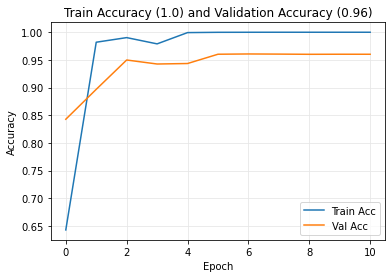

In [6]:
fit_hist = pd.DataFrame(history.history)

loss = round(np.min(fit_hist['loss']), 2)
val_loss = round(np.min(fit_hist['val_loss']), 2)
acc = round(np.max(fit_hist['accuracy']), 2)
val_acc = round(np.max(fit_hist['val_accuracy']), 2)

plt.title(f"Train Loss ({loss}) and Validation Loss ({val_loss})")
plt.plot(fit_hist['loss'], label='Train Loss')
plt.plot(fit_hist['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(color='#e6e6e6')
plt.legend()
plt.show()

plt.title(f"Train Accuracy ({acc}) and Validation Accuracy ({val_acc})")
plt.plot(fit_hist['accuracy'], label='Train Acc')
plt.plot(fit_hist['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(color='#e6e6e6')
plt.legend()
plt.show()